# Machine learning final project EDA

If you are looking at this as a notebook, you should press "run all" before reading. Some of the cells can take a bit.\
I wanted to examine a dataset related to educational outcomes so I chose [This dataset about test performance](https://www.kaggle.com/datasets/muhammadroshaanriaz/students-performance-dataset-cleaned).\
I had initially selected this dataset because it was tangentially related to a different project that didn't work out. I think this project can also provide interesting insights into potential biases in ML models,\
since most of the non-target variables relate to sensitive demographic information in some way (social class, race, gender etc.)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_students_performance.csv')
print(df.head())
print(df['average_score'].describe())

   gender race_ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.33333

# Initial EDA

As we can see, the average student is not doing better than a C on these tests.\
Because our data contains so many categorical variables, a pairplot doesn't make a lot of sense here.\
An obvious first thing to do is look at the demographic breakdown of our dataset, starting with:


# Gender

For all of these I'll just be using the "average_score" variable. There are some interesting things we could do with the different test scores, but for now we'll focus on the main one.

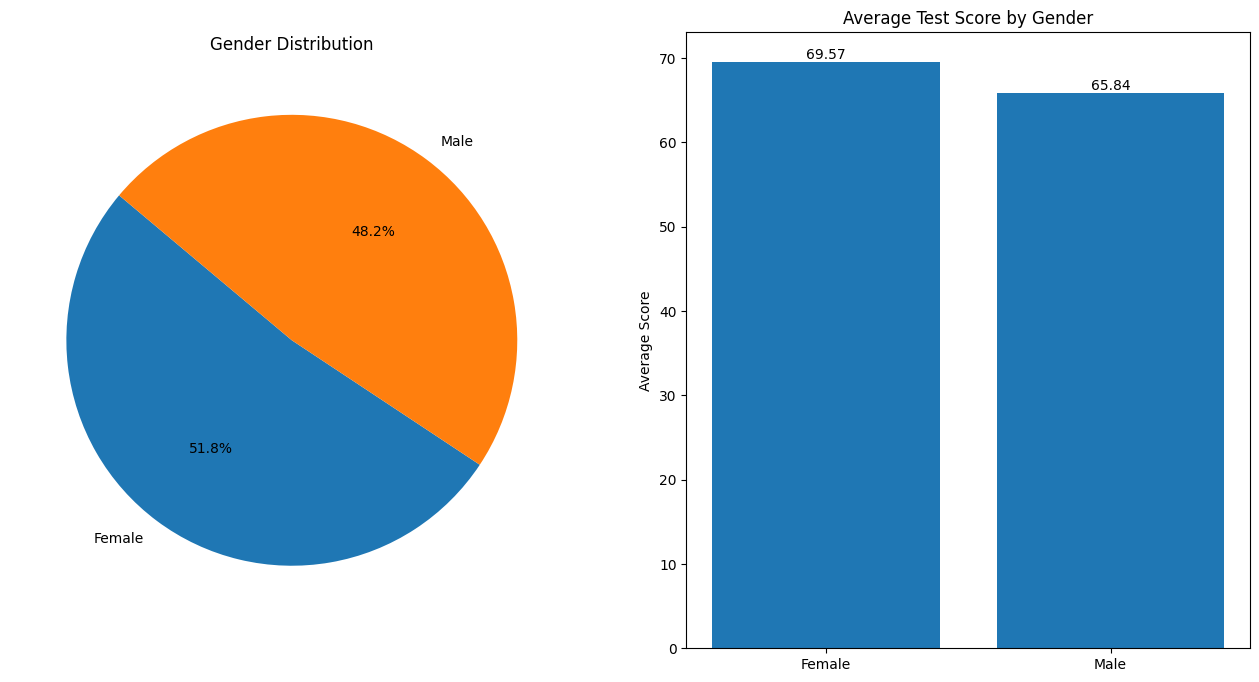

In [44]:

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Calculate the average test score for each gender
average_scores_by_gender = df.groupby('gender')['average_score'].mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for gender distribution
axs[0].pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Gender Distribution')

# Plot the bar chart for average test scores by gender
bars = axs[1].bar(['Female', 'Male'], average_scores_by_gender)
axs[1].set_title('Average Test Score by Gender')
axs[1].set_ylabel('Average Score')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Gender demographics
We can see that there are slightly more girls than boys, and that girls are bringing up the average quite a bit. We might learn more by examining the underlying distributions:

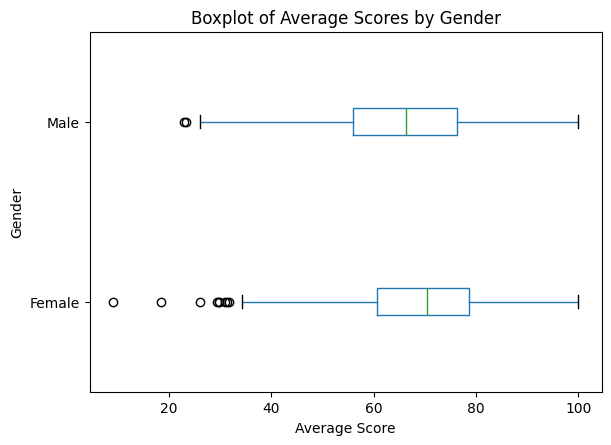

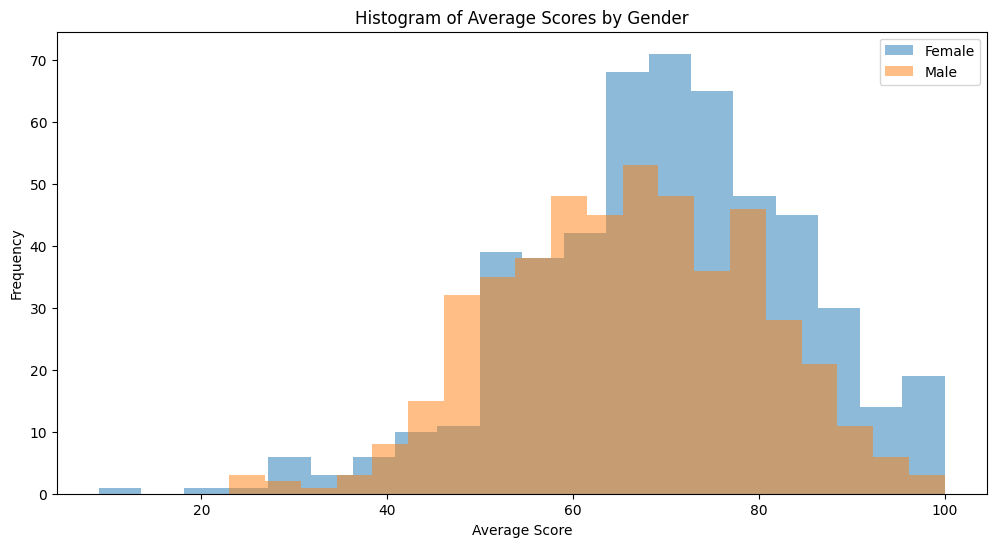

        count       mean        std   min        25%        50%        75%  \
gender                                                                       
0       518.0  69.569498  14.541809   9.0  60.666667  70.333333  78.666667   
1       482.0  65.837483  13.698840  23.0  56.000000  66.333333  76.250000   

          max  
gender         
0       100.0  
1       100.0  


In [45]:
# Create the horizontal boxplot
df.boxplot(column='average_score', by='gender', grid=False, vert=False)
plt.ylabel('Gender')
plt.xlabel('Average Score')
plt.title('Boxplot of Average Scores by Gender')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.yticks([1, 2], ['Female', 'Male'])
plt.show()

# Create paired histograms for average scores by gender
plt.figure(figsize=(12, 6))
plt.hist(df[df['gender'] == 0]['average_score'], bins=20, alpha=0.5, label='Female')
plt.hist(df[df['gender'] == 1]['average_score'], bins=20, alpha=0.5, label='Male')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Histogram of Average Scores by Gender')
plt.legend(loc='upper right')
plt.show()

# Print the summary statistics by gender
print(df.groupby('gender')['average_score'].describe())



# Gender distribution breakdown
Looking at these distributions, there are some surprising trends, we see that despite the majority of extremely low values being with the girls, the performance of boys is in general worse. The uppoer ends of both distributions are comparable.

# Race/Ethnicity 

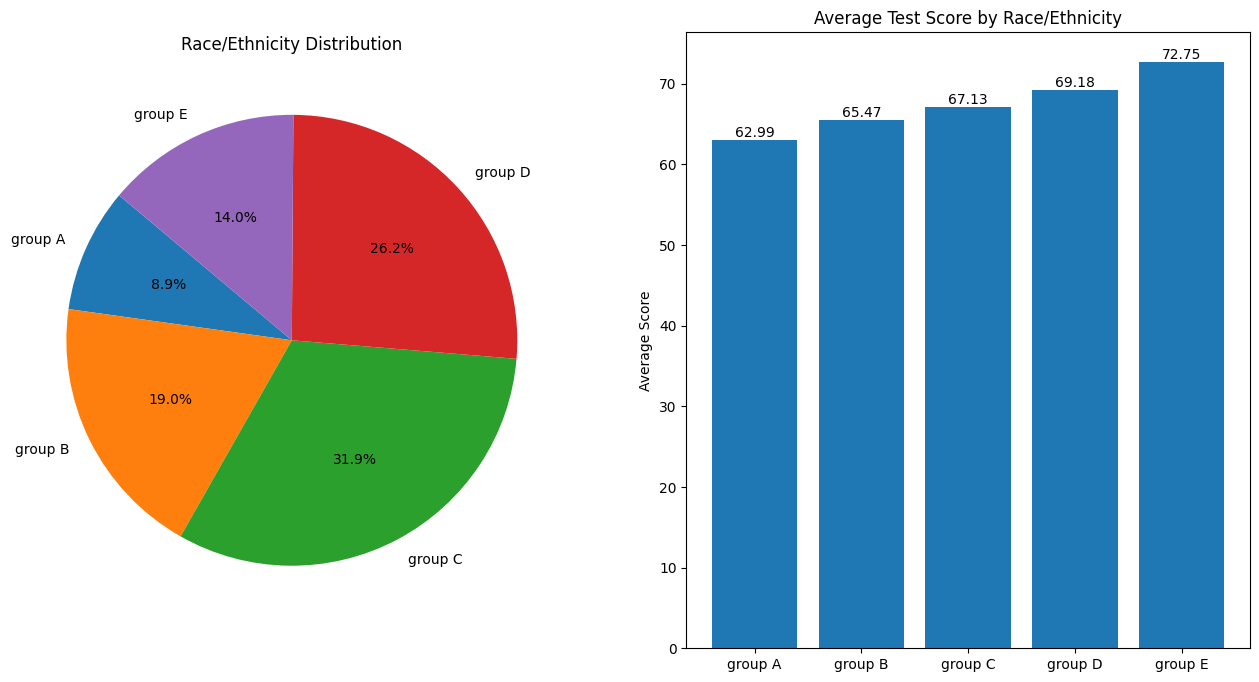

In [46]:
# Count the occurrences of each race/ethnicity and sort them alphabetically
race_counts = df['race_ethnicity'].value_counts().sort_index()

# Calculate the average test score for each race/ethnicity
average_scores_by_race = df.groupby('race_ethnicity')['average_score'].mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for race/ethnicity distribution
axs[0].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Race/Ethnicity Distribution')

# Plot the bar chart for average test scores by race/ethnicity
bars = axs[1].bar(average_scores_by_race.index, average_scores_by_race)
axs[1].set_title('Average Test Score by Race/Ethnicity')
axs[1].set_ylabel('Average Score')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Race/Ethnicity Demographics
We can see that groups C and D are the majority of students, group B is roughly proportional(1/5th), and A and E are in the minority. Interestingly, the two smallest groups have the best and worst average test scores.

<Figure size 1200x600 with 0 Axes>

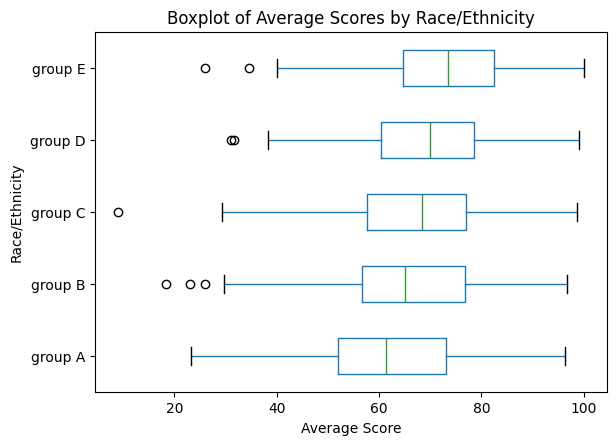

                count       mean        std        min        25%        50%  \
race_ethnicity                                                                 
group A          89.0  62.992509  14.444598  23.333333  52.000000  61.333333   
group B         190.0  65.468421  14.732133  18.333333  56.666667  65.000000   
group C         319.0  67.131661  13.872211   9.000000  57.666667  68.333333   
group D         262.0  69.179389  13.252776  31.000000  60.333333  70.000000   
group E         140.0  72.752381  14.565016  26.000000  64.666667  73.500000   

                      75%         max  
race_ethnicity                         
group A         73.000000   96.333333  
group B         76.833333   96.666667  
group C         77.000000   98.666667  
group D         78.583333   99.000000  
group E         82.416667  100.000000  


In [47]:
# Sort the DataFrame by 'race_ethnicity' in descending order
df_sorted = df.sort_values('race_ethnicity', ascending=False)

# Create the horizontal boxplot using the sorted DataFrame
plt.figure(figsize=(12, 6))
df_sorted.boxplot(column='average_score', by='race_ethnicity', grid=False, vert=False)
plt.ylabel('Race/Ethnicity')
plt.xlabel('Average Score')
plt.title('Boxplot of Average Scores by Race/Ethnicity')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.show()

# Print the summary statistics by race/ethnicity (based on sorted DataFrame)
print(df_sorted.groupby('race_ethnicity')['average_score'].describe())



Looking at these box plots and summary statistics doesn't tell us much. Attempting to do a paired histogram like with the last set of variables didn't work out very well and was too hard to read, looking at the proportions of students who do better than 70 and comparing them with the total counts can provide insight:

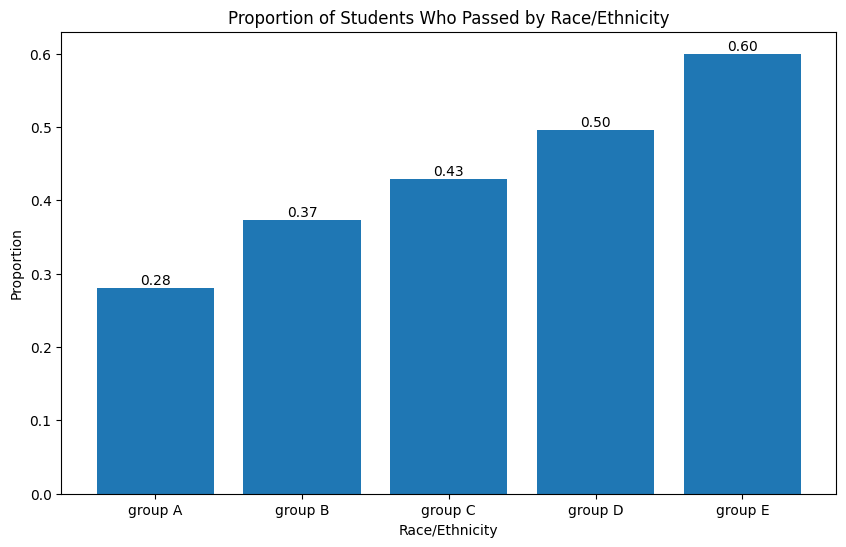

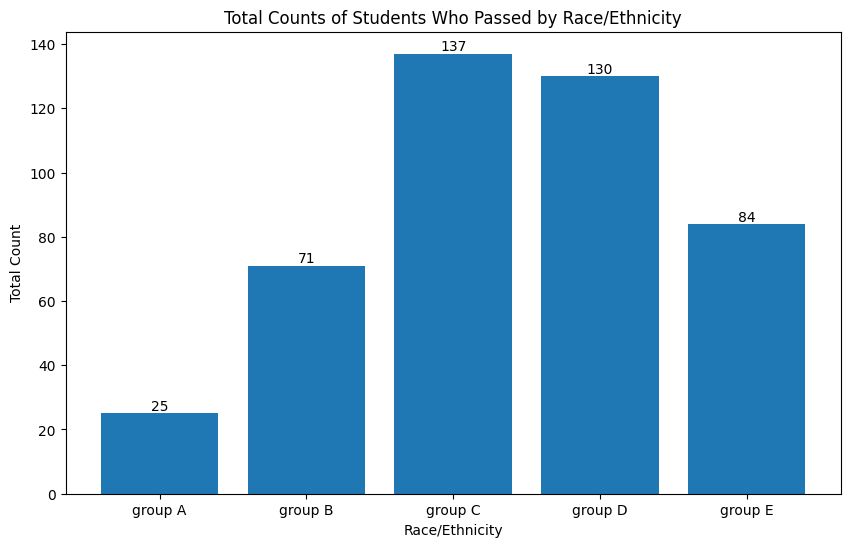

In [48]:
df['Passed'] = (df['average_score'] > 70).astype(float)

# Calculate the proportion of students who passed by race/ethnicity
proportion_passed_by_race = df.groupby('race_ethnicity')['Passed'].mean()

# Create a bar chart for the proportion of students who passed by race/ethnicity
plt.figure(figsize=(10, 6))
bars = plt.bar(proportion_passed_by_race.index, proportion_passed_by_race)
plt.title('Proportion of Students Who Passed by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Proportion')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Create a bar chart for the total counts of students who passed by race/ethnicity
total_counts_passed_by_race = df[df['Passed'] == 1]['race_ethnicity'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(total_counts_passed_by_race.index, total_counts_passed_by_race)
plt.title('Total Counts of Students Who Passed by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Count')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()


We can see that, group A is not doing very well, only about a quarter of them are passing. In general everybody but group E seems to be doing quite well.
A  thing to be wary of is how this can induce bias in our model, we should be cautious about it showing discrimination towards groupe A or favoritism towards group E.

# Parental Educational background demographics

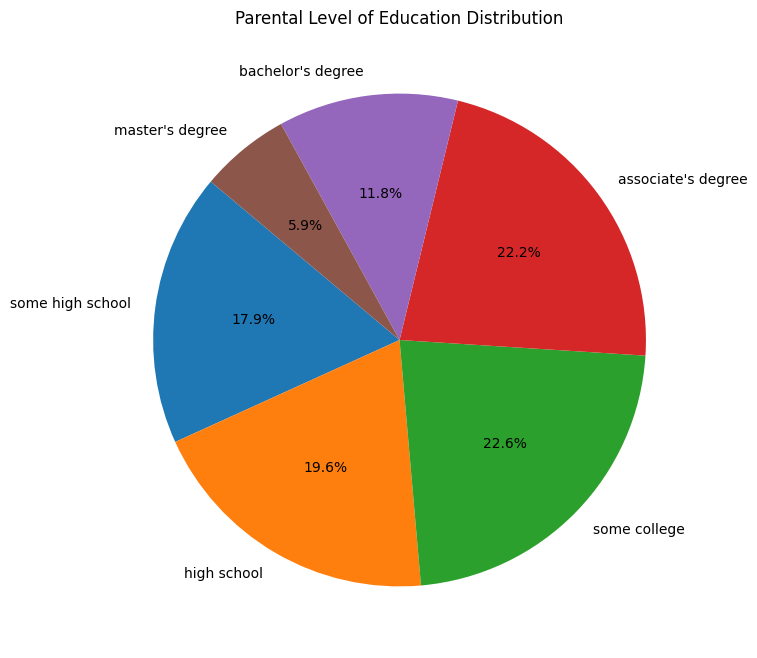

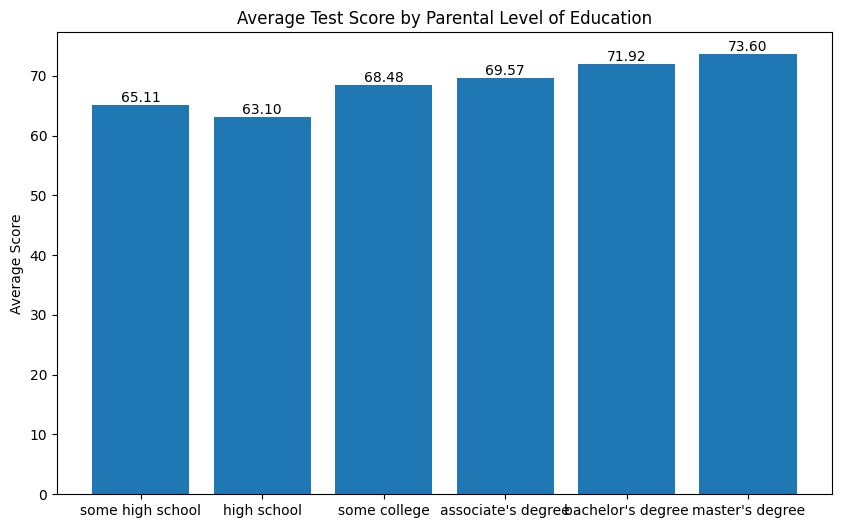

In [49]:
# Define the custom order for the education levels
education_order = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]

# Convert the 'parental_level_of_education' column to a categorical type with the specified order
df['parental_level_of_education'] = pd.Categorical(df['parental_level_of_education'], categories=education_order, ordered=True)

# Count the occurrences of each parental level of education and sort them by the specified order
education_counts = df['parental_level_of_education'].value_counts().sort_index()

# Calculate the average test score for each parental level of education
average_scores_by_education = df.groupby('parental_level_of_education', observed=False)['average_score'].mean().reindex(education_order)

# Plot the pie chart for parental level of education distribution
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Parental Level of Education Distribution')
plt.show()

# Plot the bar chart for average test scores by parental level of education
plt.figure(figsize=(10, 6))
bars = plt.bar(average_scores_by_education.index, average_scores_by_education)
plt.title('Average Test Score by Parental Level of Education')
plt.ylabel('Average Score')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


The trends follow about what you'd expect, though kids whose parents did "some high school" surprisingly did slightly better than those whose parentsh had completed high school.\

# Lunch and Test prep
The last variable in our dataset are the lunch and test prep variables, these are whether a student receives a free/reduced lunch and if they have completed a test preparation course, respectively.

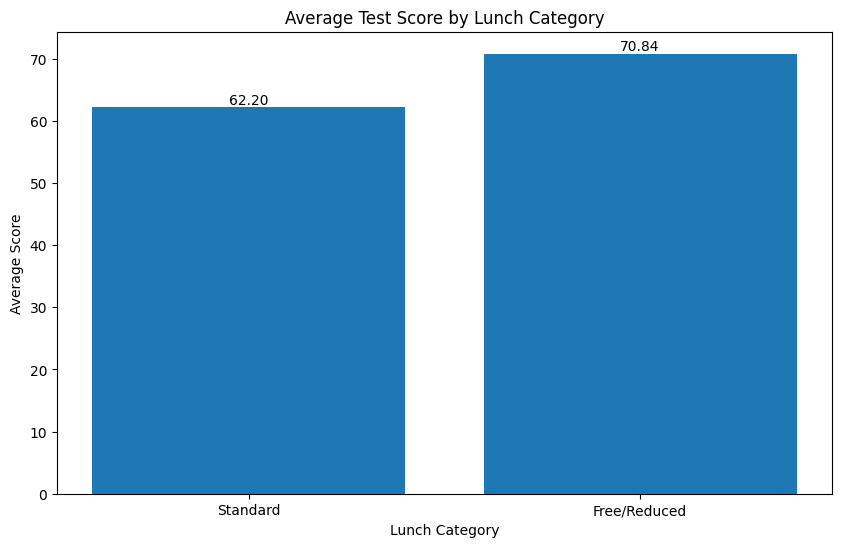

In [50]:
# Calculate the average test score for each lunch category
average_scores_by_lunch = df.groupby('lunch')['average_score'].mean()

# Create a bar chart for average test scores by lunch category
plt.figure(figsize=(10, 6))
bars = plt.bar(['Standard', 'Free/Reduced'], average_scores_by_lunch)
plt.title('Average Test Score by Lunch Category')
plt.xlabel('Lunch Category')
plt.ylabel('Average Score')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

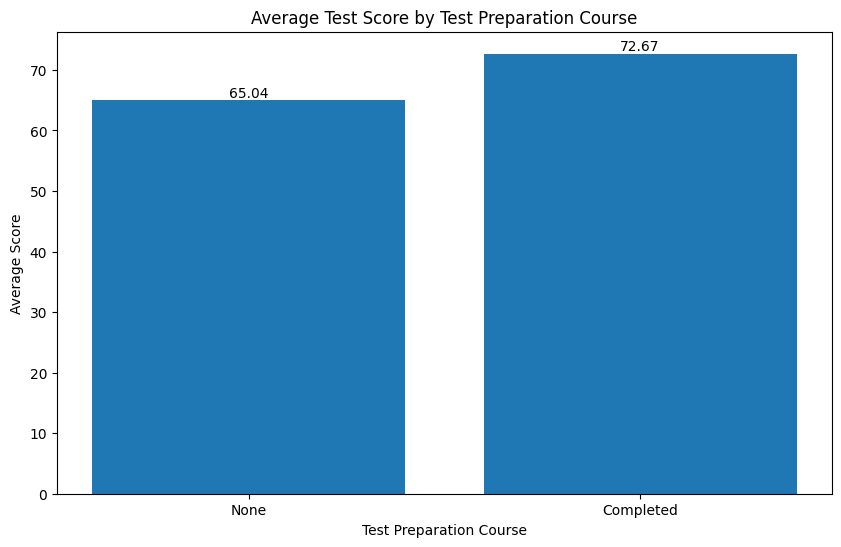

In [51]:
# Calculate the average test score for each test preparation course category
average_scores_by_test_prep = df.groupby('test_preparation_course')['average_score'].mean()

# Create a bar chart for average test scores by test preparation course category
plt.figure(figsize=(10, 6))
bars = plt.bar(['None', 'Completed'], average_scores_by_test_prep)
plt.title('Average Test Score by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

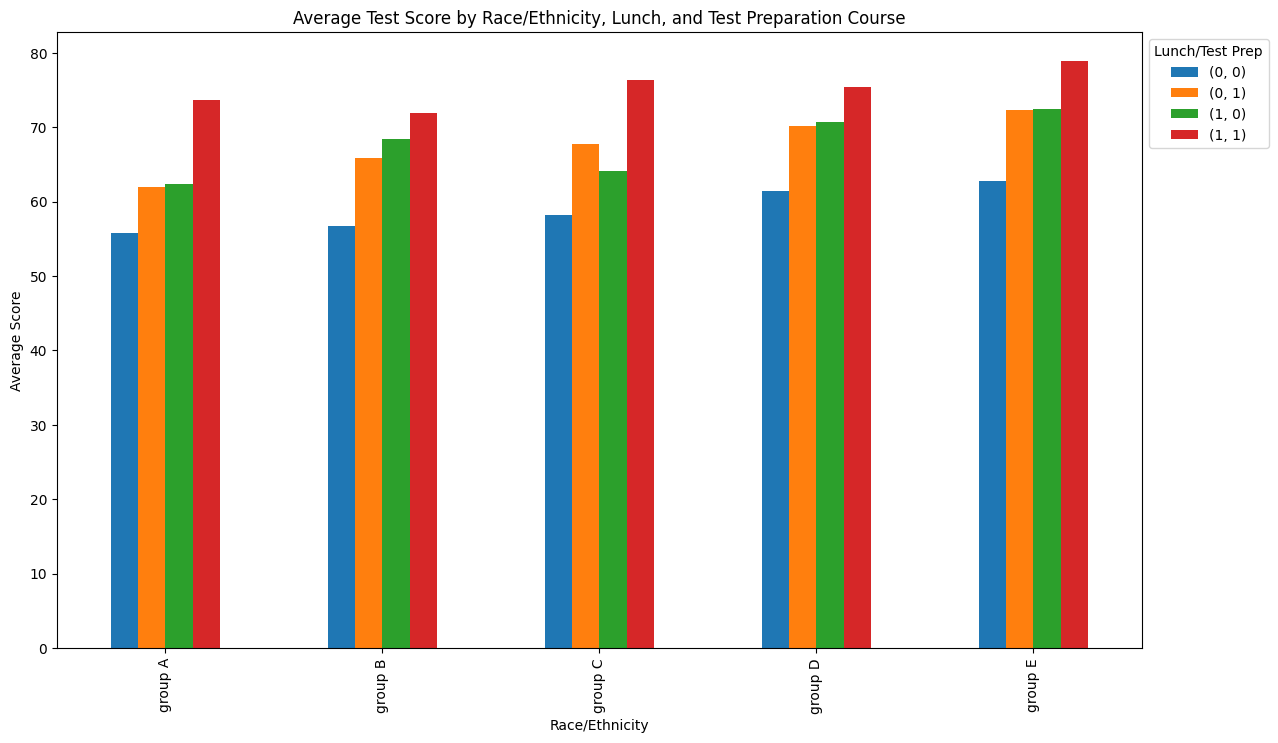

In [52]:
# Calculate the average test score for each combination of race/ethnicity, lunch, and test preparation course
average_scores_by_race_lunch_test_prep = df.groupby(['race_ethnicity', 'lunch', 'test_preparation_course'])['average_score'].mean().unstack().unstack()

# Plot the bar chart for average test scores by race/ethnicity, lunch, and test preparation course
average_scores_by_race_lunch_test_prep.plot(kind='bar', figsize=(14, 8))
plt.title('Average Test Score by Race/Ethnicity, Lunch, and Test Preparation Course')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.legend(title='Lunch/Test Prep', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

There isn't really much to say about these, both test prep and free lunch are effective boosters to student performance


# Model testing
Testing these models is quite difficult, I don't have access to more data and our original dataset is pretty small.\
In order to observe how these models perform, I am going to generate a dataframe with every possible permutation of values (there should be about 240)\
and compare the model outputs to the actual data.\

In the seperate models notebook is the code for generating our test dataframe, appending the model predictions, and outputting them as a csv below I have some visualizations of the results.

It should be noted that this test dataset is much mure heterogenous than the original, and is about 1/4 the size.\
However, given the small number of features and the fact that they are relatively independent from each other, together with how the objective of this is to evaluate potential bias in the mdoel, I think this test dataset is a reasonable facsimile.

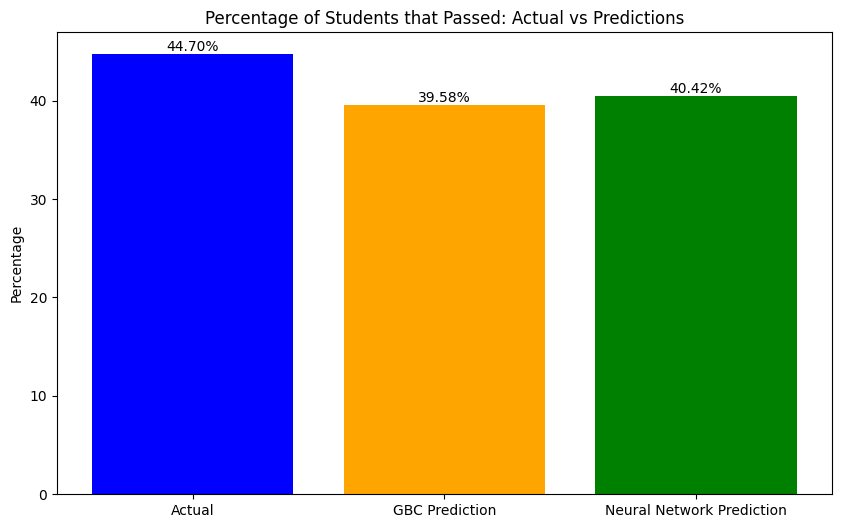

In [53]:
#Import modeled data
df_predicted = pd.read_csv('Predicted_Student_Performance.csv')
# Calculate the percentage of students that passed in the original dataset
actual_pass_percentage = df['Passed'].mean() * 100

# Calculate the percentage of students predicted to pass by the Gradient Boosting Classifier
gbc_pass_percentage = df_predicted['gbc_pass'].mean() * 100

# Calculate the percentage of students predicted to pass by the Neural Network
neural_pass_percentage = df_predicted['neural_pass'].mean() * 100

# Create a bar chart to compare the percentages
labels = ['Actual', 'GBC Prediction', 'Neural Network Prediction']
percentages = [actual_pass_percentage, gbc_pass_percentage, neural_pass_percentage]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'orange', 'green'])
plt.title('Percentage of Students that Passed: Actual vs Predictions')
plt.ylabel('Percentage')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()


Our models tend to be pretty pessimistic about the pass rate in general.

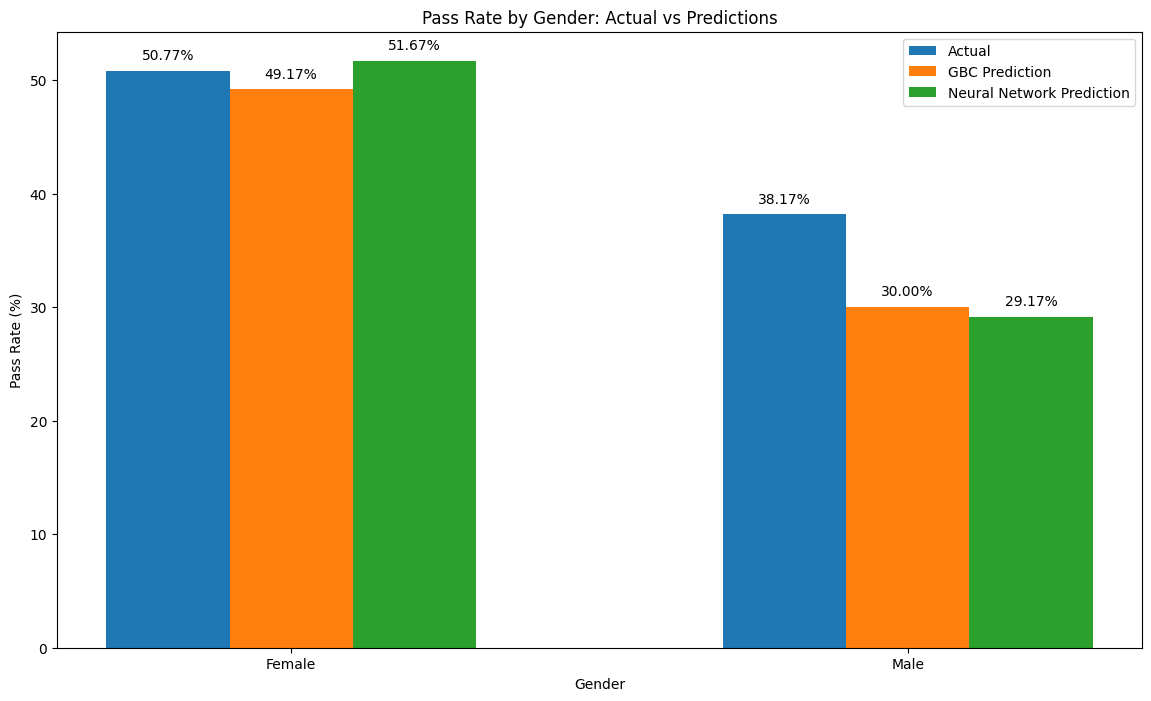

In [54]:
# Calculate the pass rate by gender for the original dataset
actual_pass_rate_by_gender = df.groupby('gender')['Passed'].mean() * 100

# Calculate the pass rate by gender for the Gradient Boosting Classifier predictions
gbc_pass_rate_by_gender = df_predicted.groupby('gender')['gbc_pass'].mean() * 100

# Calculate the pass rate by gender for the Neural Network predictions
neural_pass_rate_by_gender = df_predicted.groupby('gender')['neural_pass'].mean() * 100

# Create a bar chart to compare the pass rates by gender
labels = ['Female', 'Male']
x = range(len(labels))

plt.figure(figsize=(14, 8))
plt.bar(x, actual_pass_rate_by_gender, width=0.2, label='Actual', align='center')
plt.bar([p + 0.2 for p in x], gbc_pass_rate_by_gender, width=0.2, label='GBC Prediction', align='center')
plt.bar([p + 0.4 for p in x], neural_pass_rate_by_gender, width=0.2, label='Neural Network Prediction', align='center')

plt.xlabel('Gender')
plt.ylabel('Pass Rate (%)')
plt.title('Pass Rate by Gender: Actual vs Predictions')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()

# Add values on the bars
for i in x:
    plt.text(i, actual_pass_rate_by_gender.iloc[i] + 1, f'{actual_pass_rate_by_gender.iloc[i]:.2f}%', ha='center')
    plt.text(i + 0.2, gbc_pass_rate_by_gender.iloc[i] + 1, f'{gbc_pass_rate_by_gender.iloc[i]:.2f}%', ha='center')
    plt.text(i + 0.4, neural_pass_rate_by_gender.iloc[i] + 1, f'{neural_pass_rate_by_gender.iloc[i]:.2f}%', ha='center')

plt.show()

Gbc is more pessimistic about both genders, while our neural network model is both more biased against males and more biased towards females than gbc.

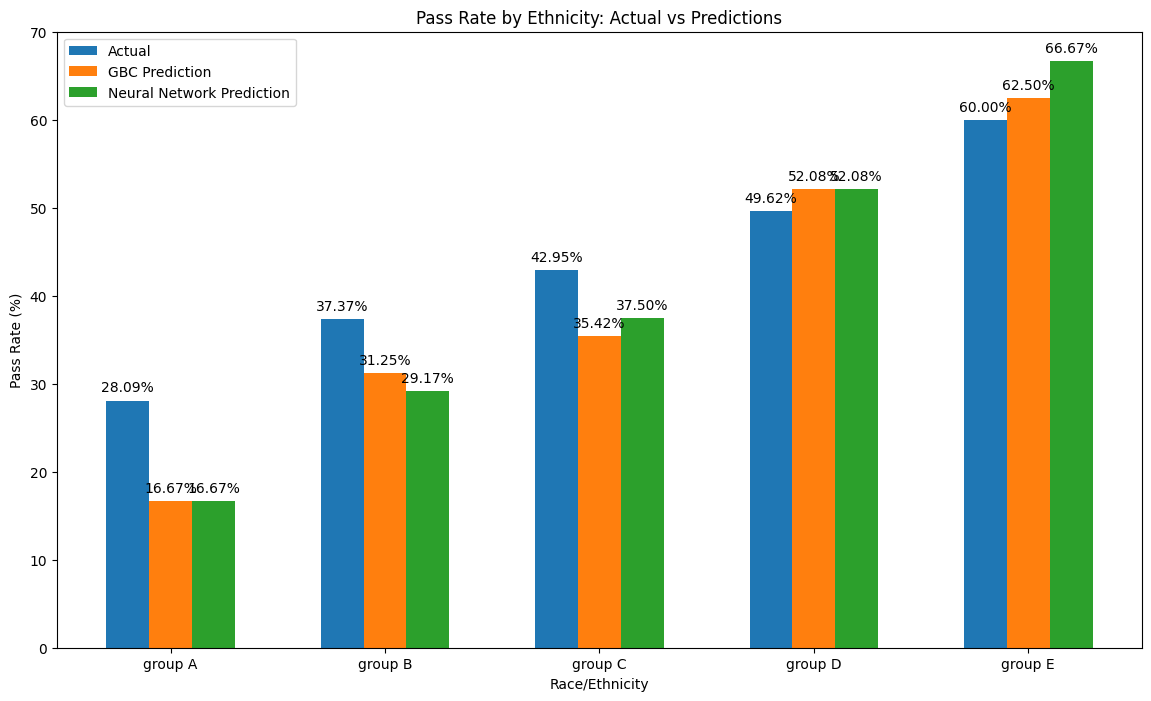

In [55]:
# Calculate the pass rate by ethnicity for the original dataset
actual_pass_rate_by_ethnicity = df.groupby('race_ethnicity')['Passed'].mean() * 100

# Calculate the pass rate by ethnicity for the Gradient Boosting Classifier predictions
gbc_pass_rate_by_ethnicity = df_predicted.groupby('race_ethnicity')['gbc_pass'].mean() * 100

# Calculate the pass rate by ethnicity for the Neural Network predictions
neural_pass_rate_by_ethnicity = df_predicted.groupby('race_ethnicity')['neural_pass'].mean() * 100

# Create a bar chart to compare the pass rates by ethnicity
labels = actual_pass_rate_by_ethnicity.index
x = range(len(labels))

plt.figure(figsize=(14, 8))
plt.bar(x, actual_pass_rate_by_ethnicity, width=0.2, label='Actual', align='center')
plt.bar([p + 0.2 for p in x], gbc_pass_rate_by_ethnicity, width=0.2, label='GBC Prediction', align='center')
plt.bar([p + 0.4 for p in x], neural_pass_rate_by_ethnicity, width=0.2, label='Neural Network Prediction', align='center')

plt.xlabel('Race/Ethnicity')
plt.ylabel('Pass Rate (%)')
plt.title('Pass Rate by Ethnicity: Actual vs Predictions')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()

# Add values on the bars
for i in x:
    plt.text(i, actual_pass_rate_by_ethnicity.iloc[i] + 1, f'{actual_pass_rate_by_ethnicity.iloc[i]:.2f}%', ha='center')
    plt.text(i + 0.2, gbc_pass_rate_by_ethnicity.iloc[i] + 1, f'{gbc_pass_rate_by_ethnicity.iloc[i]:.2f}%', ha='center')
    plt.text(i + 0.4, neural_pass_rate_by_ethnicity.iloc[i] + 1, f'{neural_pass_rate_by_ethnicity.iloc[i]:.2f}%', ha='center')

plt.show()

In general these models end up seeming pretty biased along racial lines, with different training parameters I've seen the neural network give both A and group B a 0 percent pass rate at different points. Both show a strong preference for group E, with about 2/3 of students from that group passing. 

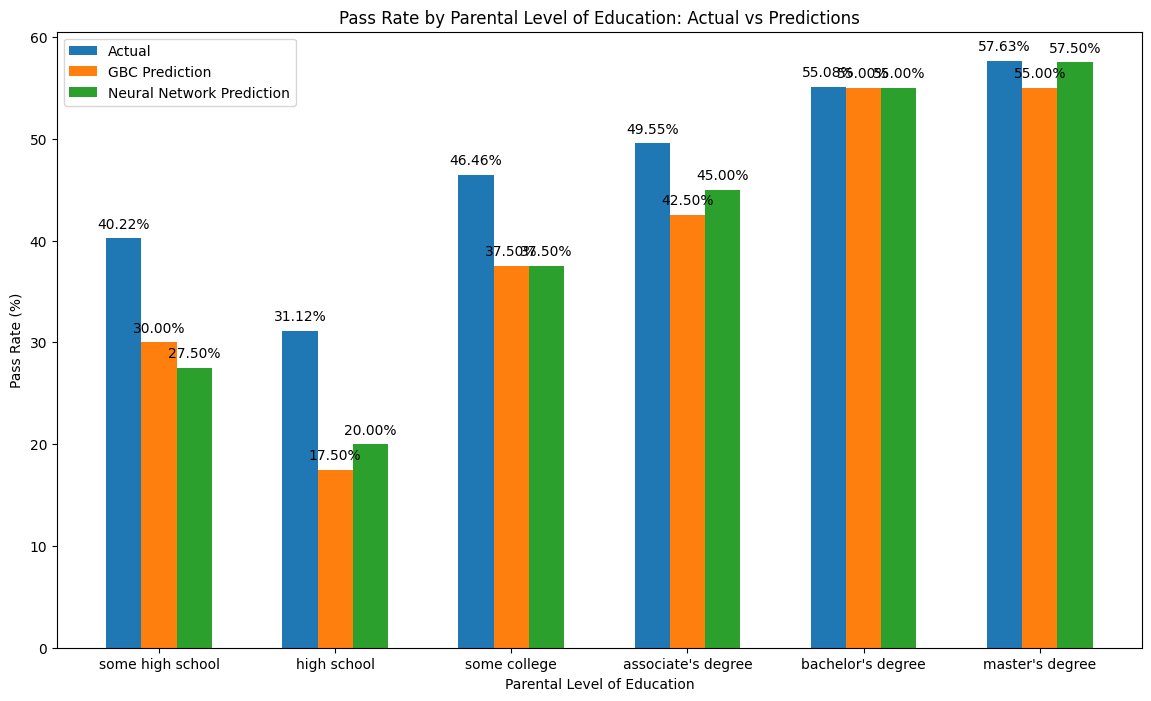

In [56]:
df_predicted['parental_level_of_education'] = pd.Categorical(df_predicted['parental_level_of_education'], categories=education_order, ordered=True)

#calculate the pass rate by parental level of education for the original dataset
actual_pass_rate_by_parental_level_of_education = df.groupby('parental_level_of_education', observed=False)['Passed'].mean() * 100
# Calculate the pass rate by parental level of education for the Gradient Boosting Classifier predictions
gbc_pass_rate_by_parental_level_of_education = df_predicted.groupby('parental_level_of_education', observed=False)['gbc_pass'].mean() * 100
#calculate the pass rate by parental level of education for the Neural Network predictions
neural_pass_rate_by_parental_level_of_education = df_predicted.groupby('parental_level_of_education', observed=False)['neural_pass'].mean() * 100
# Create a bar chart to compare the pass rates by parental level of education
labels = actual_pass_rate_by_parental_level_of_education.index
x = range(len(labels))
plt.figure(figsize=(14, 8))
plt.bar(x, actual_pass_rate_by_parental_level_of_education, width=0.2, label='Actual', align='center')
plt.bar([p + 0.2 for p in x], gbc_pass_rate_by_parental_level_of_education, width=0.2, label='GBC Prediction', align='center')
plt.bar([p + 0.4 for p in x], neural_pass_rate_by_parental_level_of_education, width=0.2, label='Neural Network Prediction', align='center')
plt.xlabel('Parental Level of Education')
plt.ylabel('Pass Rate (%)')
plt.title('Pass Rate by Parental Level of Education: Actual vs Predictions')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
# Add values on the bars
for i in x:
    plt.text(i, actual_pass_rate_by_parental_level_of_education.iloc[i] + 1, f'{actual_pass_rate_by_parental_level_of_education.iloc[i]:.2f}%', ha='center')
    plt.text(i + 0.2, gbc_pass_rate_by_parental_level_of_education.iloc[i] + 1, f'{gbc_pass_rate_by_parental_level_of_education.iloc[i]:.2f}%', ha='center')
    plt.text(i + 0.4, neural_pass_rate_by_parental_level_of_education.iloc[i] + 1, f'{neural_pass_rate_by_parental_level_of_education.iloc[i]:.2f}%', ha='center')
plt.show()

# Model evaluation and conclusions
Overall the amount of bias shown by these models is pretty concerning to me, for any group that appears to underperform in our original sample, that is reflected more strongly in the model's predictions. While I am not sure how to account for the difference in the underlyihng samples,  something I find particularly concerning is how much being the worst performing group in a categorical variable clearly deeply biases the model against you. This is really visible in the education and ethnicity variables.\

This has concerning implications for applications of these kinds of models on real world evaluations, for instance, while demographics like these are federally protected from employment discrimination, it's also entirely possible for some analogue of these to emerge in a dataset. Given that models like these can be used to determine hiring or admittance to academic programs, the sensitivity of these models to bias in the original dataset means they are particularly vulnerable to reproducing and exacerbating said bias if used to make decisions.

# Possible improvements
Ultimately, In order to be confident I had an unbiased model I'd need to be more confident in my tests for bias. Implementing some kind of way to generate datasets that are more similar to the input dataset would be useful. I had also planned to train models to take in one test score, but couldn't figure out how to generate the scores for testing.